In [1]:
import networkx as nx
# create_using=nx.DiGraph() 表示构造的是有向图
G = nx.read_edgelist('input/Wiki_edgelist.txt', create_using=nx.DiGraph())

In [2]:
import random

# 从 start_node 开始随机游走
def deepwalk_walk(walk_length, start_node):
    walk = [start_node]
    while len(walk) < walk_length:
        cur = walk[-1]
        cur_nbrs = list(G.neighbors(cur))
        if len(cur_nbrs) > 0:
            walk.append(random.choice(cur_nbrs))
        else:
            break
    return walk

# 产生随机游走序列
def _simulate_walks(nodes, num_walks, walk_length):
    walks = []
    for _ in range(num_walks):
        random.shuffle(nodes)
        for v in nodes:
            walks.append(deepwalk_walk(walk_length=walk_length, start_node=v))
    return walks

# 得到所有节点
nodes = list(G.nodes())
# 得到序列
walks = _simulate_walks(nodes, num_walks=80, walk_length=10)

In [3]:
from gensim.models import Word2Vec
# 默认嵌入到100维
w2v_model = Word2Vec(walks,sg=1,hs=1)
# 打印其中一个节点的嵌入向量
print(w2v_model['1397'])

[-0.11714587 -0.03430809 -0.11278474 -0.03013223  0.42909348 -0.10423975
 -0.1485245  -0.37748528  0.21585503 -0.01431207  0.48355448 -0.2967001
 -0.26995617 -0.42344648 -0.16555129 -0.06096647  0.37271765  0.34395242
  0.18664438 -0.10420188 -0.23385786  0.5422869  -0.3479007  -0.17638361
 -0.13737549  0.00552753  0.0565522  -0.94817805 -0.3001872   0.4628907
  0.07172181  0.3263085  -0.03859296  0.5016846  -0.73168796 -0.32912394
 -0.36685452  0.28993058  0.15104723  0.10124219 -0.54832333  0.15146035
  0.05116219  0.56512165 -0.07823775  0.48120165 -0.17412135  0.26535904
 -0.14888008 -0.21441004  0.29771787  0.2759363   0.1721166   0.22587062
  0.6339142  -0.25252917 -0.04871451  0.23966482 -0.16296875  0.05734517
 -0.12664995 -0.10498864  0.12598562  0.04206561  0.3191896   0.5729959
  0.0494091  -0.6597412  -0.20459345  0.24378838 -0.42044035  0.08828565
 -0.05758591  0.292171   -0.22553527 -0.40621662 -0.6903939  -0.04004291
 -0.21769218  0.09154686 -0.37111166 -0.01794116 -0.02

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [5]:
X = w2v_model[w2v_model.wv.vocab]

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


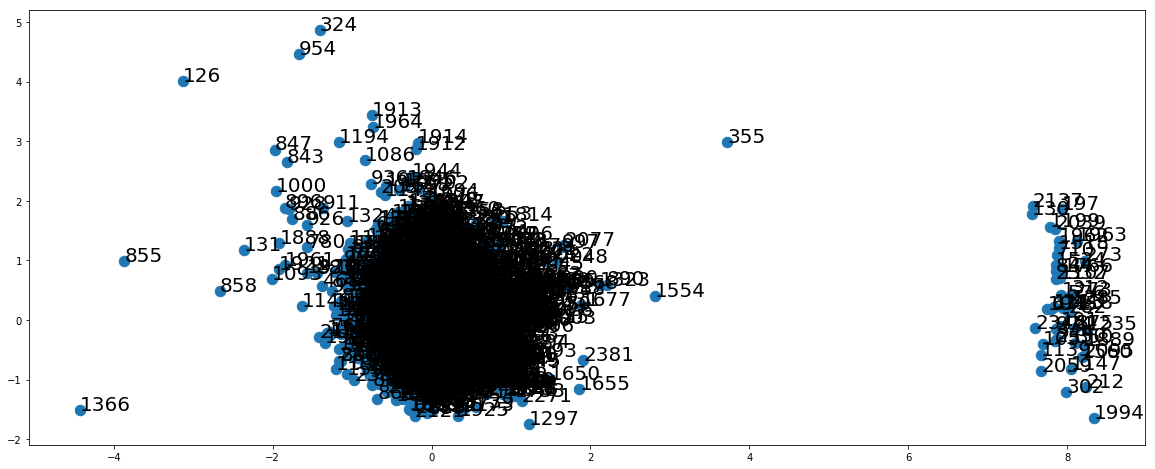

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20,8))
plt.scatter(result[:,0],result[:,1],s=110)
words = list(w2v_model.wv.vocab)
for i,word in enumerate(words):
    plt.annotate(word,xy=(result[i,0],result[i,1]),fontsize=20)
